In [1]:
# Importing pandas
import pandas as pd

In [2]:
# Setting up dataframe
file = 'Data/london_weather.csv'
df = pd.read_csv(file)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


1. Convert the date column to datetime dtype. Double-check the result. Is it what you expected? If not, be sure to correct it by entering the appropriate format!

In [3]:
# We can run a datetime method for the date column to see results
df['datetime'] = pd.to_datetime(df['date'])
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  int64         
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
 10  datetime          15341 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1970-01-01 00:00:00.019790101
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1970-01-01 00:00:00.019790102
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1970-01-01 00:00:00.019790103


### Datetime Indexing

In [4]:
# We need to clear up the datetime entries
# Let's use a format code to make datetime presentable
fmt = "%B %d, %Y"
df.loc[0,'datetime'].strftime(fmt)

'January 01, 1970'

In [5]:
# This isn't displaying proper order
df['datetime'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['datetime'].head()

0   1979-01-01
1   1979-01-02
2   1979-01-03
3   1979-01-04
4   1979-01-05
Name: datetime, dtype: datetime64[ns]

In [6]:
# Setting index as datetime
df = df.set_index('datetime')
df = df.drop(columns = ['date'])
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [7]:
### Select only from years 2000 onward.
### We also only want the following columns: precipitation, mean_temp, min_temp, max_temp, snow_depth
df = df.loc['2000-01-01':,['precipitation', 'mean_temp', 'min_temp', 'max_temp','snow_depth']]
df.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


## Imputation

In [8]:
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [9]:
# Let's check nulls
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [10]:
import matplotlib.pyplot as plt

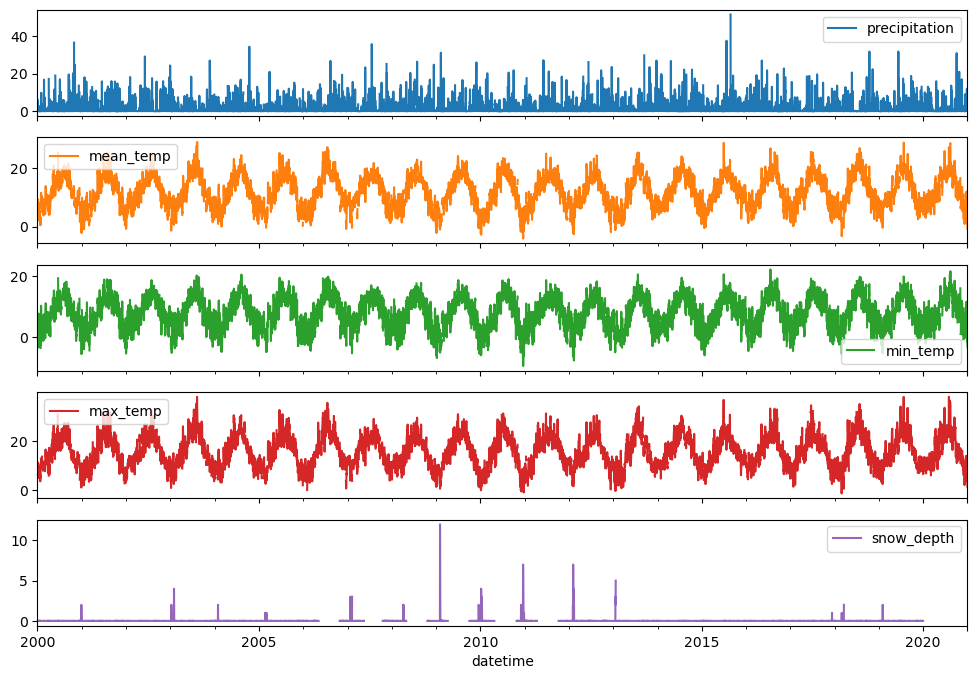

In [11]:
# Now let's plot the features
df.plot(figsize = (12,8), subplots=True);

In [12]:
# Given the regularity of first three columns and semi-predictable patterns, we can interpolate
df['max_temp'] = df['max_temp'].interpolate()
df['mean_temp'] = df['mean_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()

In [13]:
import numpy as np
# Rainfall appears frequent enough we could impute mean into nulls
df['precipitation'] = df['precipitation'].fillna(np.mean(df['precipitation']))
df['precipitation'].isna().sum()

0

In [14]:
# Snowfall is far too irregular to predict or impute. Will label nulls as zeroes
df['snow_depth'] = df['snow_depth'].fillna(0)
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

### Q1: What month had the most precipitation between 2000 through 2010?

In [15]:
# With every problem we tackle, we'll copy the df to keep original
dfp = df['precipitation'].copy()
dfp = dfp.loc['2000-01-01':'2010-12-31']

In [16]:
pn = dfp.resample("MS").sum()
pn.name = 'Resampled'
pn.head()

datetime
2000-01-01    19.470128
2000-02-01    63.923376
2000-03-01    15.123376
2000-04-01    75.246752
2000-05-01    71.846752
Freq: MS, Name: Resampled, dtype: float64

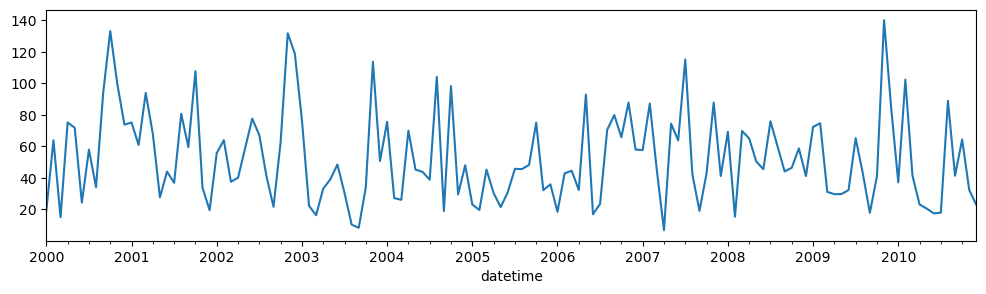

In [17]:
pn.plot(figsize=(12,3), subplots=True);

In [18]:
# Making format for presentable date
fmt = "%B, %Y"

In [19]:
# What has been max precipitation and the date it occurred?
max_month = pn.idxmax()
date = max_month.strftime(fmt)
date

'November, 2009'

In [20]:
max_precip = pn.loc[max_month].round(2)

In [35]:
# Giving statement of data
print(f'The month with the most precipitation during first decade of the 21st century is {date} with a record of {max_precip} inches.')

The month with the most precipitation during first decade of the 21st century is November, 2009 with a record of 140.12 inches.


In [31]:
pn = pd.DataFrame(pn)

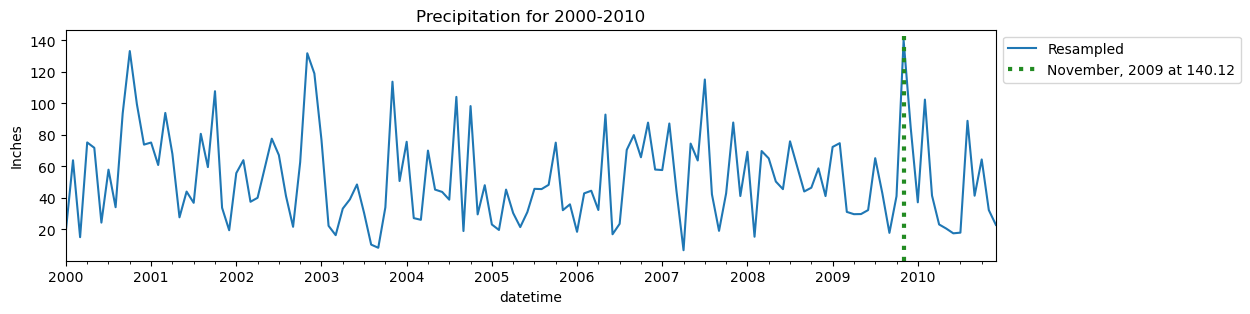

In [61]:
fig, ax = plt.subplots(figsize=(12,3))
pn.plot(ax=ax)
ax.set( title='Precipitation for 2000-2010',
      ylabel='Inches')
ax.axvline('November, 2009',color='forestgreen',lw=3, ls=':', label=f'{date} at {max_precip}')
ax.legend(bbox_to_anchor=[1,1]);

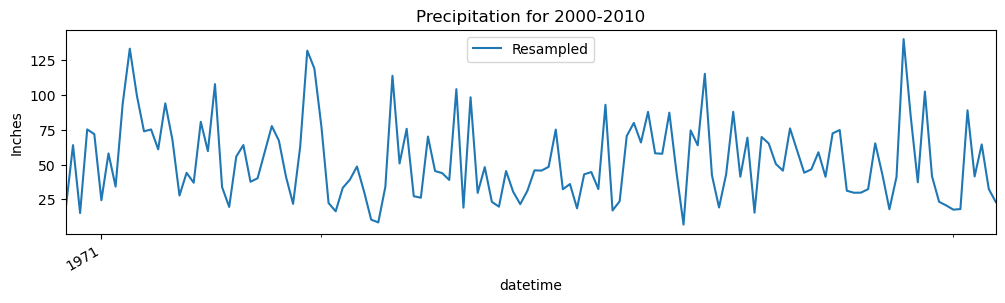

In [55]:
ax = pn.plot(figsize=(12,3))
ax.set( title='Precipitation for 2000-2010',
      ylabel='Inches')

# customize major ticks 
major_loc =  mdates.YearLocator(1)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)
plt.xticks(rotation=90)

# customize minor ticks
minor_loc =  mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(minor_loc)

## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate();

### There is an issue that seems to be with mdates method that prevents current data from displaying. I have attempted adding in format from second figure to first with ax argument but issue persists

### Q2: Which year between 2000-2020 had the coolest average temperature?

In [44]:
# With every problem we tackle, we'll copy the df to keep original
dfc = df['mean_temp'].copy()
dfc = dfc.loc['2000-01-01':'2020-12-31']

In [45]:
# Resampling with mean
cn = dfc.resample("Y").mean()
cn.name = 'Resampled'
cn.head()

datetime
2000-12-31    11.575683
2001-12-31    11.331507
2002-12-31    12.084247
2003-12-31    12.114521
2004-12-31    11.900683
Freq: A-DEC, Name: Resampled, dtype: float64

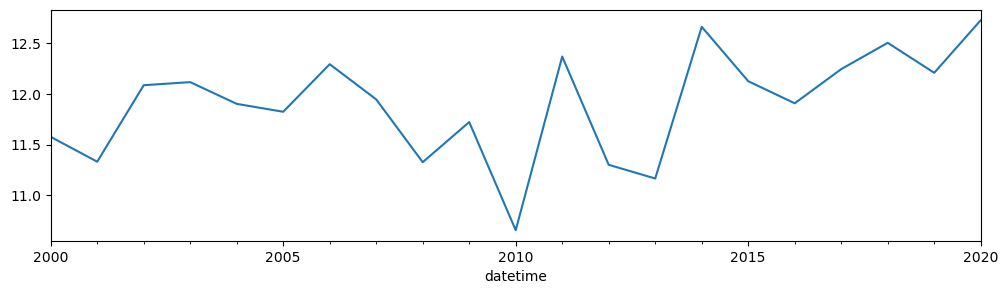

In [46]:
cn.plot(figsize=(12,3), subplots=True);

In [47]:
# Making year format
fmt = "%Y"

In [50]:
# What is the year from 2000 to 2020 with the coolest average temperature?
cool_avg = cn.idxmin()
year = cool_avg.strftime(fmt)
year

'2010'

In [54]:
result = cn.loc[cool_avg].round(2)
print(f'The year with the coolest average temperature is {year}, averaging {result} degrees celsius.')

The year with the coolest average temperature is 2010, averaging 10.66 degrees celsius.


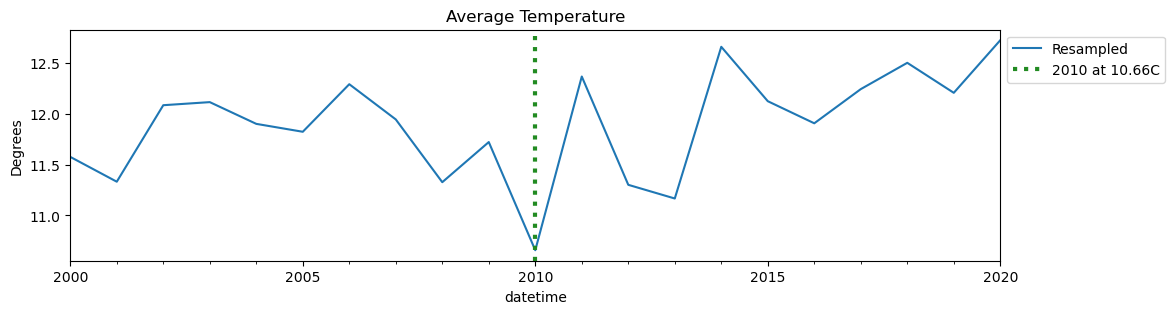

In [64]:
fig, ax = plt.subplots(figsize=(12,3))
cn.plot(ax=ax)
ax.set( title='Average Temperature',
      ylabel='Degrees')
ax.axvline('2010',color='forestgreen',lw=3, ls=':', label=f'{year} at {result}C')
ax.legend(bbox_to_anchor=[1,1]);

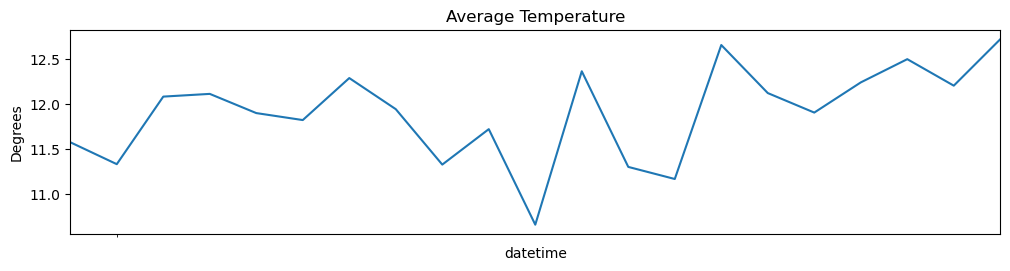

In [63]:
fig, ax = plt.subplots(figsize=(12,3))
cn.plot(ax=ax)

ax.set( title='Average Temperature',
      ylabel='Degrees')

# customize major ticks 
major_loc =  mdates.YearLocator(5)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)
plt.xticks(rotation=90)

# customize minor ticks
minor_loc =  mdates.MonthLocator(interval=1)
ax.xaxis.set_minor_locator(minor_loc)

## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate();